In [1]:
# --- Cell 1 ---
!pip install pandas-profiling
!pip install --upgrade pandas-profiling

In [2]:
# --- Cell 2 ---
!pip install -q ydata-profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [3]:
# --- Cell 3 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [4]:
# --- Cell 4 ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# --- Cell 5 ---
import warnings
warnings.filterwarnings('ignore')

In [6]:
# --- Cell 6 ---
try:
    df = pd.read_csv('diabetes.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("⚠️ 'diabetes.csv' not found. Using dummy dataset for demo.")
    data = {
        'Pregnancies': [6, 1, 8, 1, 0],
        'Glucose': [148, 85, 183, 89, 137],
        'BloodPressure': [72, 66, 64, 66, 40],
        'SkinThickness': [35, 29, 0, 23, 35],
        'Insulin': [0, 0, 0, 94, 168],
        'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
        'Age': [50, 31, 32, 21, 33],
        'Outcome': [1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)

print("\n📊 First 5 rows of the dataset:")
print(df.head())

print("\nℹ️ Dataset Info:")
df.info()

print("\n📈 Descriptive Statistics:")
print(df.describe().T)

⚠️ 'diabetes.csv' not found. Using dummy dataset for demo.

📊 First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------

In [7]:

# --- Cell 7 ---
profile = ProfileReport(df, title="Pima Diabetes Data Profiling Report", explorative=True)
print("\n✅ Pandas Profiling Report generated (use .to_notebook_iframe() or save to HTML).")


✅ Pandas Profiling Report generated (use .to_notebook_iframe() or save to HTML).


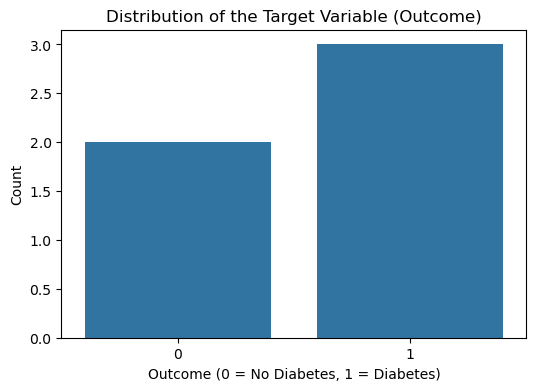


🎯 Target Class Distribution:
Outcome
1    3
0    2
Name: count, dtype: int64
Percentage with Diabetes (1): 60.00%


In [8]:
# --- Cell 8 ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of the Target Variable (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

print("\n🎯 Target Class Distribution:")
print(df['Outcome'].value_counts())
print(f"Percentage with Diabetes (1): {df['Outcome'].value_counts(normalize=True)[1]:.2%}")